In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True,
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 36019364.13it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1141368.24it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 9508523.43it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3752320.03it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [9]:
from torch.utils.data import DataLoader
loaders = {
           'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
           'test': DataLoader(test_data, batch_size=100, shuffle=False, num_workers=1)
}

In [10]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7bc21581d690>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7bc21581e620>}

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.softmax(x)

In [14]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train_data(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n')

In [15]:
for epoch in range(1, 11):
  train_data(epoch)
  test()

<ipython-input-13-7db9e937af89>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303635
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.296818
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.199898
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.049383
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.945611
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.833828
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.778296
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.769372
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.738949
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.777229
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.675549
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.705877
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.686230
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.716369
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.663723
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.601875
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.607345
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.655859
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.612697
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.616109
Train Epoch

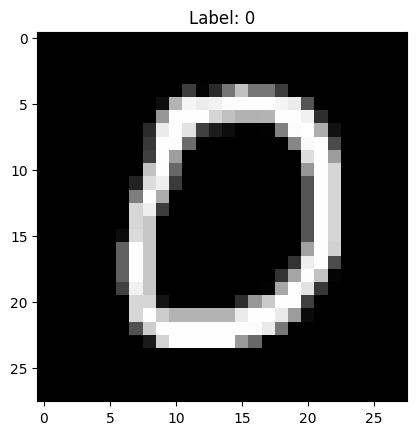

In [18]:
import matplotlib.pyplot as plt

example_data, example_target = next(iter(loaders['test']))
plt.imshow(example_data[10].squeeze(), cmap='gray')
plt.title(f'Label: {example_target[10]}')
plt.show()


<ipython-input-13-7db9e937af89>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


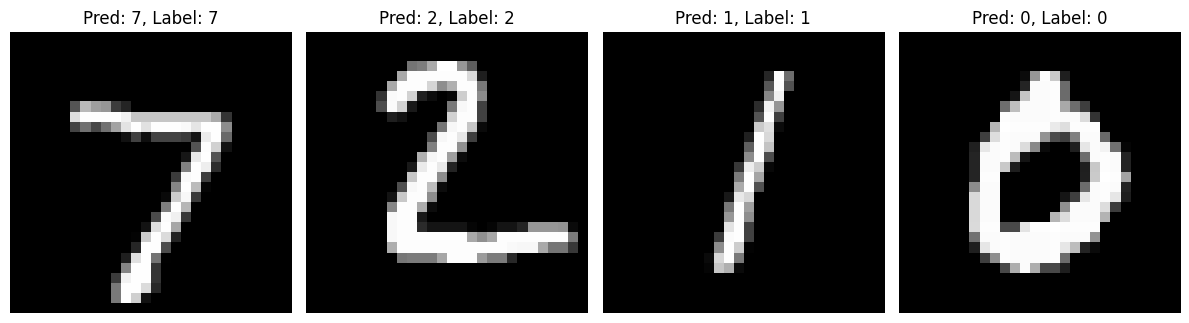

In [38]:
model.eval()
with torch.no_grad():
  example_data, example_target = next(iter(loaders['test']))
  example_data, example_target = example_data.to(device), example_target.to(device)
  output = model(example_data)
  pred = output.argmax(dim=1, keepdim=True)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
  axes[i].imshow(example_data[i].cpu().squeeze(), cmap='gray')
  axes[i].set_title(f'Pred: {pred[i].item()}, Label: {example_target[i].item()}')
  axes[i].axis('off')

plt.tight_layout()
plt.show()